In [1]:
include("./src/dataSplit.jl")
include("./src/MyPlot.jl")

Main.MyPlot

In [2]:
dataSplit.dataSplitTest()
MyPlot.MyPlotTest()

dataSplit used!MyPlot used!

In [3]:
df = dataSplit.getDF("./data_proj_414.csv");
title = names(df);

In [4]:
data = df;
data_X = data[:,2];
data_Y = data[:,3];
data_Potter = data[:,4];
data_Weasley = data[:,5];
data_Granger = data[:,6];
data_Trip = data[:,7];
data_Close = data[:,8];
data_Far = data[:,9];

In [5]:
P = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Potter,1);
W = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Weasley,1);
G = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Granger,1);

In [6]:
A = dataSplit.ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Granger,1,true);

In [7]:
print(length(data_X),", ",length(P[1]),", ",length(W[2]),", ",length(G[3]),", ",length(P[1])+length(W[2])+length(G[3]))

24094, 8000, 8336, 7758, 24094

In [8]:
P_trip = dataSplit.get_trip(P);
W_trip = dataSplit.get_trip(W);
G_trip = dataSplit.get_trip(G);

In [9]:
All_trip = dataSplit.get_trip(A);

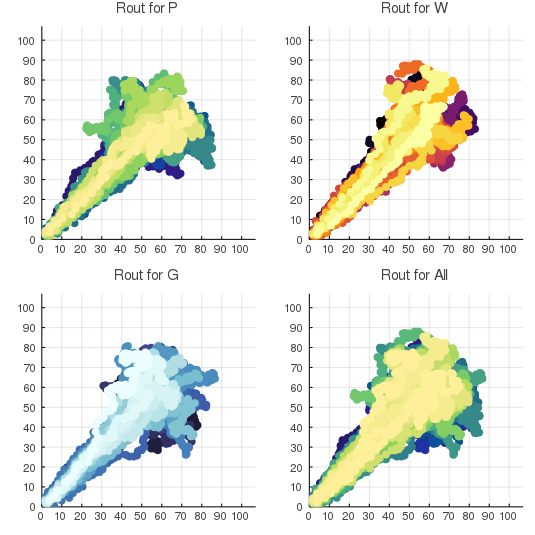

In [10]:
using Plots
gr()
# pyplot()
p1 = MyPlot.getPic(P_trip, :haline, 1, 5, "Rout for P", 10)
p2 = MyPlot.getPic(W_trip, :inferno, 1, 5, "Rout for W", 10)
p3 = MyPlot.getPic(G_trip, :ice, 1, 5, "Rout for G", 10)
# p4 = MyPlot.PicAll3(P,W,G,:magma,1,5,"Rout for All",10)
p4 = MyPlot.getPic(All_trip, :haline, 1, 5, "Rout for All", 10)
plot(p1,p2,p3,p4,layout=(2,2),legend=false, fmt = :png)

In [11]:
# savefig("pic/fig1.eps")
savefig("pic/fig1.png")
# savefig("pic/fig1.svg")

In [12]:
p_all = MyPlot.getPic(All_trip, :inferno, 1, 5, "Rout for All", 10)
plot(p_all, legend=false, fmt = :png)
savefig("pic/fig0.png")
# savefig("pic/fig0.svg")

In [13]:
X = vcat(vcat(P[1],W[1]),G[1]);
Y = vcat(vcat(P[2],W[2]),G[2]);
Weight_close = vcat(vcat(P[4],W[4]),G[4]);
Weight_far = vcat(vcat(P[5],W[5]),G[5]);
print(length(X)," ", length(Y)," ", length(Weight_close)," ",length(Weight_far))

24094 24094 24094 24094

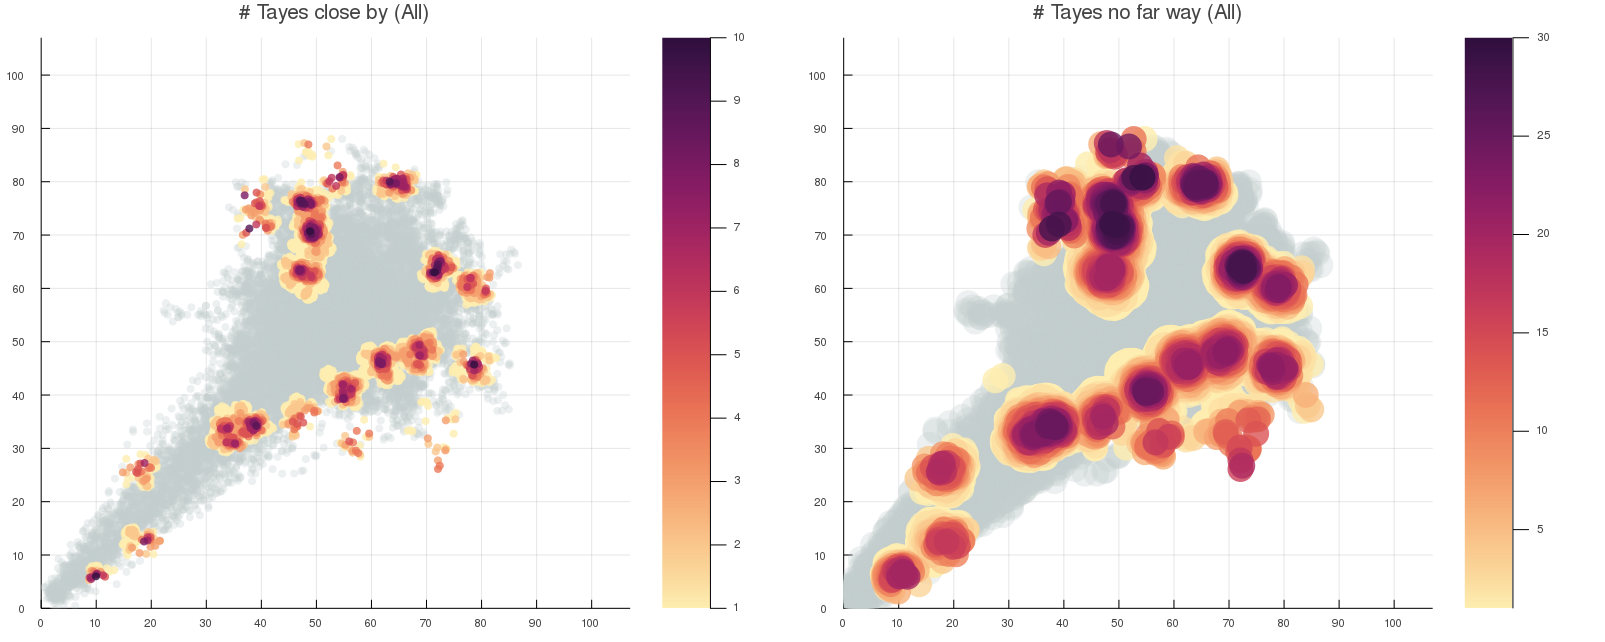

In [14]:
using Plots
# pyplot();
gr();
pw_close = MyPlot.getWeightPic(X,Y,Weight_close,:matter,1,5,"# Tayes close by (All)",true);
pw_far = MyPlot.getWeightPic(X,Y,Weight_far,:matter,3,5,"# Tayes no far way (All)",true);
plot(pw_close, pw_far,layout=(1,2), size=(107*15,107*6), fmt = :png)

In [15]:
savefig("pic/fig5.png")
# savefig("pic/fig5.svg")